W207: Final Project
===========

**(Step 3a: Linear Models)**


Our team (Danish Iqbal, KC Tobin, Jason Vantomme) is working through the Kaggle "House Prices: Advanced Regression Techniques" competition @ https://www.kaggle.com/c/house-prices-advanced-regression-techniques.


**Intro for your notebook here.**

In [120]:
# ENVIRONMENT SETUP

# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

import datetime as dt
import pandas as pd
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression, Lasso, BayesianRidge, Ridge
from sklearn import preprocessing, metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.precision',6)
pd.set_option('display.max_columns',None) 
pd.set_option('display.max_rows',None) 
pd.set_option('display.max_colwidth',1000)

In [121]:
## Load Feature Engineered Data
fe_train = pd.read_csv('data/train_fe.csv')
fe_train_labels = fe_train["SalePrice"].copy()
fe_train = fe_train.drop(["SalePrice"], axis=1)

train, dev, train_labels, dev_labels = train_test_split(fe_train,fe_train_labels,train_size=.5,random_state=207)

train_labels = np.log(train_labels)
dev_labels = np.log(dev_labels)

print "TRAIN DATA: ", train.shape
print "TRAIN LABELS: ", train_labels.shape
print            
print "DEV DATA: ", dev.shape
print "DEV LABELS: ", dev_labels.shape
print

test = pd.read_csv('data/test_fe.csv')
print "TEST DATA: ", test.shape

TRAIN DATA:  (730, 358)
TRAIN LABELS:  (730,)

DEV DATA:  (730, 358)
DEV LABELS:  (730,)

TEST DATA:  (1459, 358)


Before RFE R^2 : 0.742913317456
Optimal # of features : 324


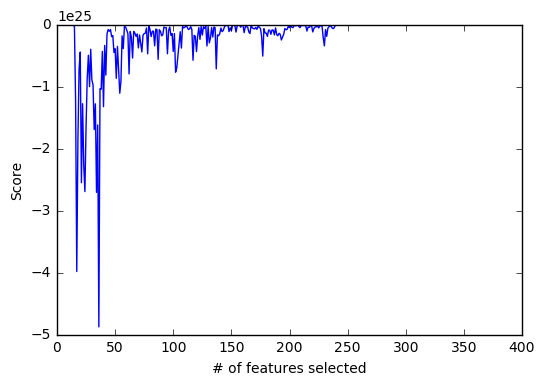

After RFE R^2 : 0.748361349193
DEV RMSE: -0.196842039821


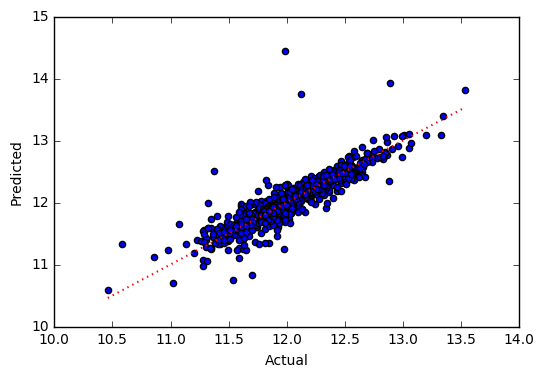

In [122]:
###Linear Regression

clf = LinearRegression()
clf.fit(train, train_labels)
print("Before RFE R^2 : " + str(clf.score(dev, dev_labels)))

rfecv = RFECV(estimator=clf, step=1, cv=5)
rfecv.fit(train, train_labels)
print("Optimal # of features : %d" % rfecv.n_features_)

plt.figure()
plt.xlabel("# of features selected")
plt.ylabel("Score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

feature_mask = rfecv.ranking_ == 1
local_dev = dev.iloc[:, feature_mask].copy()
local_train = train.iloc[:, feature_mask].copy()
clf.fit(local_train, train_labels)
print("After RFE R^2 : " + str(clf.score(local_dev, dev_labels)))

dev_predict = clf.predict(local_dev)
rmse = -np.sqrt(mean_squared_error(dev_predict, dev_labels))
print("DEV RMSE: " + str(rmse))
Linear_dev_predict = dev_predict

fig, ax = plt.subplots()
ax.scatter(dev_labels, Linear_dev_predict)
ax.plot([dev_labels.min(), dev_labels.max()], [dev_labels.min(), dev_labels.max()], 'r:', linewidth=1.5, lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

local_test= test.iloc[:, feature_mask].copy()
Linear_test_predict = clf.predict(local_test)

Before RFE R^2 : 0.814726058043
Optimal # of features : 305


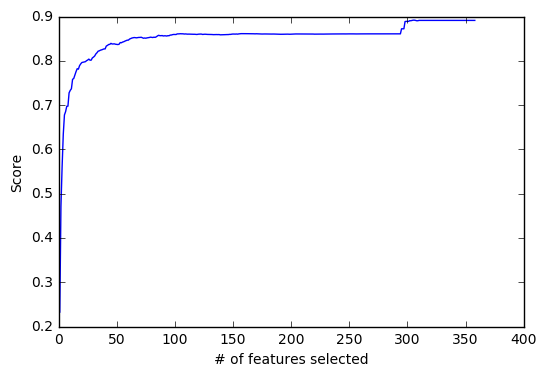

After RFE R^2 : 0.846179749998
DEV RMSE: -0.153899050109


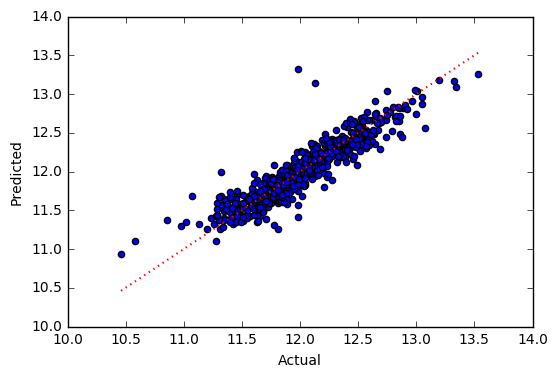

In [123]:
### Ridge Regression

clf = Ridge(alpha=10)
clf.fit(train, train_labels)
print("Before RFE R^2 : " + str(clf.score(dev, dev_labels)))

rfecv = RFECV(estimator=clf, step=1, cv=2)
rfecv.fit(train, train_labels)
print("Optimal # of features : %d" % rfecv.n_features_)

plt.figure()
plt.xlabel("# of features selected")
plt.ylabel("Score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

feature_mask = rfecv.ranking_ == 1
local_dev = dev.iloc[:, feature_mask].copy()
local_train = train.iloc[:, feature_mask].copy()
clf.fit(local_train, train_labels)
print("After RFE R^2 : " + str(clf.score(local_dev, dev_labels)))

dev_predict = clf.predict(local_dev)
rmse = -np.sqrt(mean_squared_error(dev_predict, dev_labels))
print("DEV RMSE: " + str(rmse))
Ridge_dev_predict = dev_predict

fig, ax = plt.subplots()
ax.scatter(dev_labels, Ridge_dev_predict)
ax.plot([dev_labels.min(), dev_labels.max()], [dev_labels.min(), dev_labels.max()], 'r:', linewidth=1.5, lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

local_test= test.iloc[:, feature_mask].copy()
Ridge_test_predict = clf.predict(local_test)

Before RFE R^2 : 0.816936233761
Optimal # of features : 107


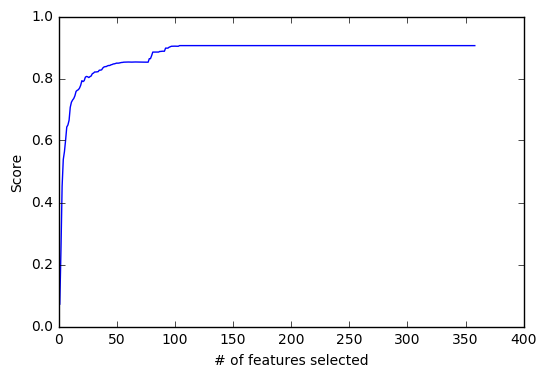

After RFE R^2 : 0.816936267397
DEV RMSE: -0.167892130217


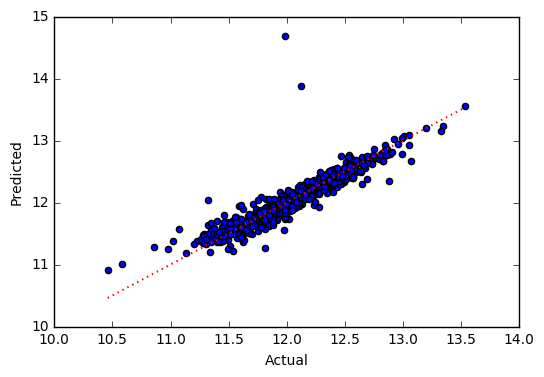

In [124]:
### Lasso Regression

clf = Lasso(alpha=0.001)
clf.fit(train, train_labels)
print("Before RFE R^2 : " + str(clf.score(dev, dev_labels)))

rfecv = RFECV(estimator=clf, step=1, cv=4)
rfecv.fit(train, train_labels)
print("Optimal # of features : %d" % rfecv.n_features_)

plt.figure()
plt.xlabel("# of features selected")
plt.ylabel("Score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

feature_mask = rfecv.ranking_ == 1
local_dev = dev.iloc[:, feature_mask].copy()
local_train = train.iloc[:, feature_mask].copy()
clf.fit(local_train, train_labels)
print("After RFE R^2 : " + str(clf.score(local_dev, dev_labels)))

dev_predict = clf.predict(local_dev)
rmse = -np.sqrt(mean_squared_error(dev_predict, dev_labels))
print("DEV RMSE: " + str(rmse))
Lasso_dev_predict = dev_predict

fig, ax = plt.subplots()
ax.scatter(dev_labels, Lasso_dev_predict)
ax.plot([dev_labels.min(), dev_labels.max()], [dev_labels.min(), dev_labels.max()], 'r:', linewidth=1.5, lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

local_test= test.iloc[:, feature_mask].copy()
Lasso_test_predict = clf.predict(local_test)

In [125]:
dev_output_cols= {'Lasso_predict':Lasso_dev_predict, 
                  'Ridge_predict':Ridge_dev_predict, 
                  'Actual':dev_labels}
linear_dev_DF = pd.DataFrame(data=dev_output_cols)
print "OUTPUTTING TRAIN DATA: "
print "SIZE: ", linear_dev_DF.shape
print "COLS: ", linear_dev_DF.columns
print            
linear_dev_DF.to_csv('data/linear_out_dev.csv')

test_output_cols= {'Lasso_predict':Lasso_test_predict, 
                   'Ridge_predict':Ridge_test_predict}
linear_test_DF = pd.DataFrame(data=test_output_cols)
print "OUTPUTTING TEST DATA: "
print "SIZE: ", linear_test_DF.shape
print "COLS: ", linear_test_DF.columns
print            
linear_test_DF.to_csv('data/linear_out_test.csv')

SyntaxError: invalid syntax (<ipython-input-125-181dcb7b4894>, line 13)